<a href="https://colab.research.google.com/github/piyush02nir/World_Bank_Global_Education/blob/main/World_Bank_Global_Education_Analysis_Self_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path1=('/content/drive/MyDrive/projects..../EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/projects..../EdStatsCountry.csv')
path3=('/content/drive/MyDrive/AlmaBetter/Projects/Capston_project_World_bank_Global_Education/WorldBank Global Education Analysis/data/EdStatsData.csv')
path4=('/content/drive/MyDrive/projects..../EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/projects..../EdStatsSeries.csv')

In [5]:
main_data=pd.read_csv(path3)


***Getting overview of data***

In [6]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [7]:
# Droppe null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [8]:
main_data.drop(['Country Code'],axis=1,inplace=True)

In [9]:
main_data.set_index(['Country Name'],inplace=True)

In [10]:
Income_df=main_data.loc[['High income', 'Upper middle income','Middle income', 'Low & middle income', 'Low income', 'Lower middle income', 'Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification']]

In [11]:
Region_df=main_data.loc[['World','OECD members','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America', 'Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

GDP Data and GDP per capita OECD vs World

In [18]:
GDP_current_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_per_capita_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.CD']
GDP_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.KD']
GDP_per_capita_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.KD']

In [19]:
GDP_current_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

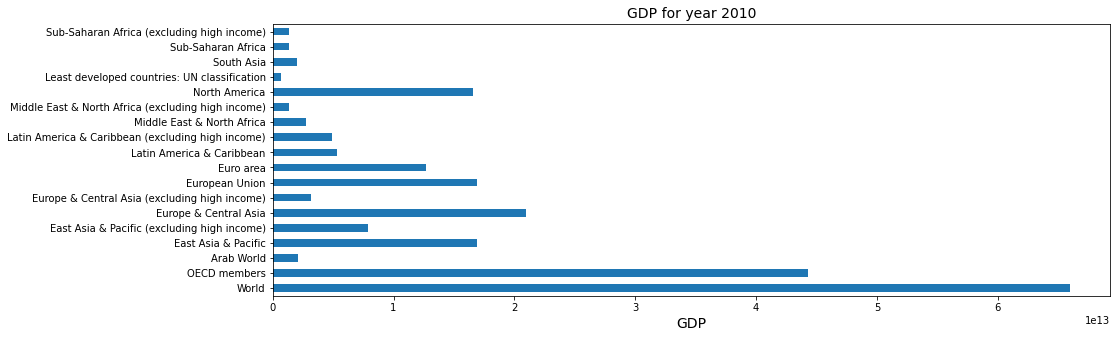

In [20]:
plt.rcParams['figure.figsize']=(15,5)
GDP_current_df['2010'].transpose().plot(kind='barh')
plt.title('GDP for year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

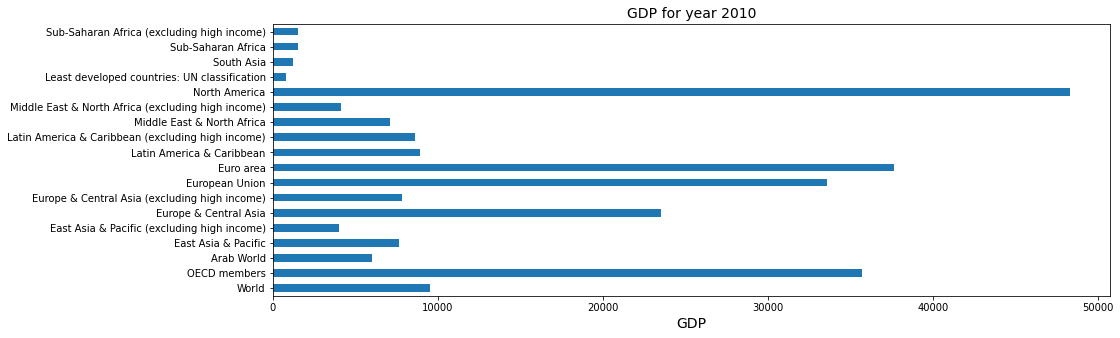

In [21]:
plt.rcParams['figure.figsize']=(15,5)
GDP_per_capita_df['2010'].transpose().plot(kind='barh')
plt.title('GDP for year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

*****Population growth data from main data*****




In [22]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']


In [23]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [24]:
graph_1=population_growth.transpose()

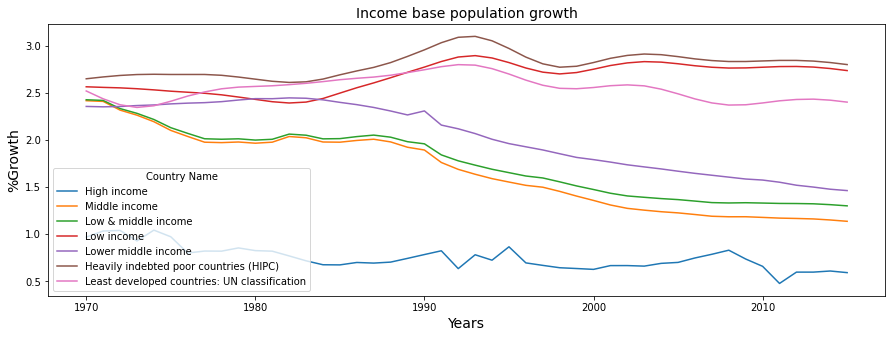

In [25]:
plt.rcParams['figure.figsize']=(15,5)
graph_1.plot()
plt.title('Income base population growth',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.show()

Global Mortality Rate

In [26]:
mortality_rate =Income_df[Income_df['Indicator Code']=='SH.DYN.MORT']

In [27]:
mortality_rate.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
mortality_rate = mortality_rate.transpose()

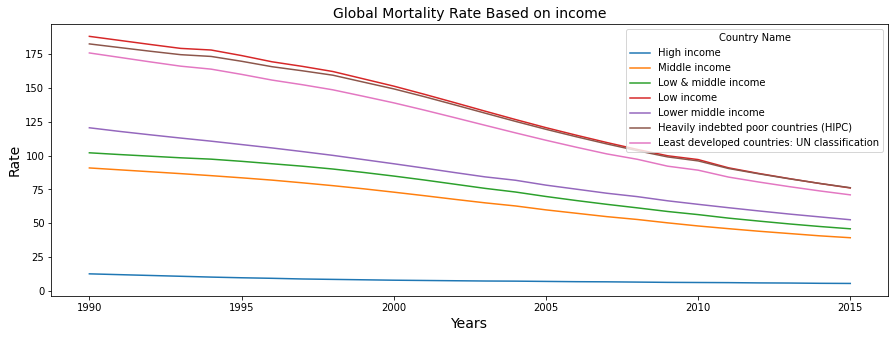

In [29]:
plt.rcParams['figure.figsize']=(15,5)
mortality_rate.plot()
plt.title('Global Mortality Rate Based on income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.show()

Percent of population under 14

GDP Share

In [30]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']

In [ ]:
GDP_Share.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [38]:
quantity = GDP_Share['2010']
print(quantity)

Country Name
High income                                     4.520682e+13
Middle income                                   2.045861e+13
Low & middle income                             2.075124e+13
Low income                                      2.923397e+11
Lower middle income                             4.666965e+12
Heavily indebted poor countries (HIPC)          4.678519e+11
Least developed countries: UN classification    6.619345e+11
Name: 2010, dtype: float64


In [1]:
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]

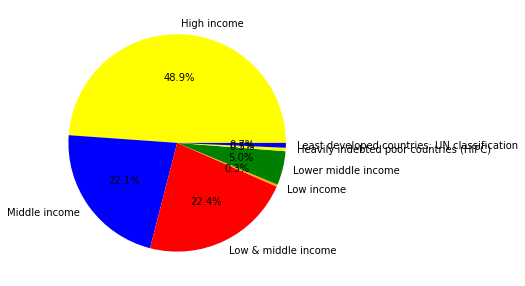

In [44]:
plt.pie(quantity,labels=name,autopct='%0.1f%%',colors=['yellow','blue','red','orange','green'])
plt.show()